In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D


pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_19274/2804050344.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
def format_name(path, type="full"):
    if type == "full":
        try:
            parts = path.split('/')
            owner = parts[2].split('-')[1]
            repo = parts[3].split('-2023')[0]
            return '/'.join([owner, repo])
        except:
            return path
    elif type == "short":
        try:
            parts = path.split('/')
            repo = parts[3].split('-2023')[0]
            return repo
        except:
            return path
    else:
        return path




df = pd.read_json("sv_results.json")
df.sort_values(by=["total_calls"], ascending=True, inplace=True)
df['time'] = df['time'] / 3600
df['repo'] = df['repo'].apply(lambda x: format_name(x, type="short"))

df.head()


,repo,time,calls,cache_calls,total_calls
14,blueprint-css,0.005556,56,35,91
24,asgard,0.118056,792,1786,2578
26,arcus-memcached,0.146389,760,2055,2815
18,paperclip,0.296944,2287,6981,9268
27,jbpm,1.076944,6495,7450,13945


In [3]:
axis_x_var = 'total_calls'

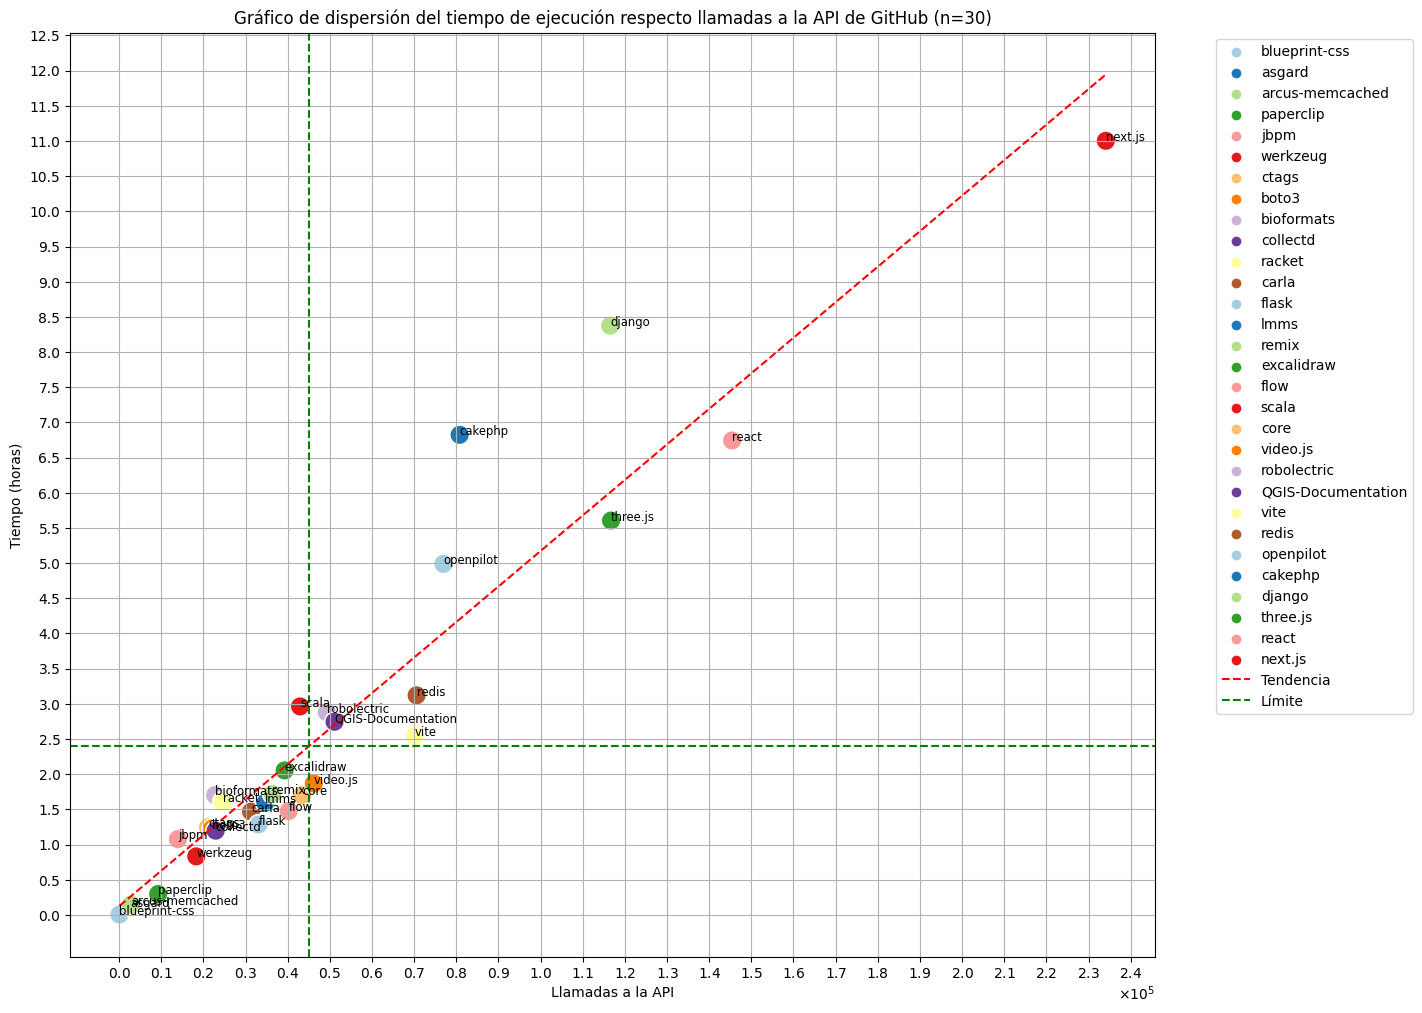

In [15]:
from matplotlib.ticker import ScalarFormatter


z = np.polyfit(df[axis_x_var], df['time'], 1)
p = np.poly1d(z)


fig, ax = plt.subplots(figsize=(14, 12))

scatter = sns.scatterplot(data=df, x=axis_x_var, y='time', hue='repo', palette='Paired', s=200, ax=ax)

ax.set_title(f"Gráfico de dispersión del tiempo de ejecución respecto llamadas a la API de GitHub (n={df.shape[0]})")
ax.set_xlabel('Llamadas a la API')
ax.set_ylabel('Tiempo (horas)')



ax.plot(df[axis_x_var], p(df[axis_x_var]), "r--")
ax.axhline(y=2.4, color='g', linestyle='--')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color='r', linestyle='--'))
handles.append(Line2D([0], [0], color='g', linestyle='--'))
labels.append('Tendencia')
labels.append('Límite')
ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1.05, 1))

x_intersection = (2.4 - p[0]) / p[1]
ax.axvline(x=x_intersection, color='g', linestyle='--')

for line in range(0,df.shape[0]):
     scatter.text(df.total_calls[line]+0.2, df.time[line], df.repo[line], horizontalalignment='left', size='small', color='black')

_, ymax = plt.ylim()
_, xmax = plt.xlim()
yticks_new = np.arange(0, ymax, 0.5)
xticks_new = np.arange(0, xmax, 10000)
plt.yticks(yticks_new)
plt.xticks(xticks_new)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.grid(True)


### Estimate time based on api calls

In [5]:
calls = 138229
estimated_time = p(calls)
print(f"Estimated time: {round(estimated_time,2)} hours")


Estimated time: 7.1 hours
